# Logistic Regression

In [1]:
from warnings import filterwarnings

filterwarnings("ignore")

# Step 1 - Data Ingestion


In [2]:
import pandas as pd

df = pd.read_csv("iris.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# Target Feature is species

In [3]:
df["species"].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

# Because i have 3 species it is multiclass classification

# Step 2 : Perform Basic data quality checks

In [4]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [5]:
df.duplicated().sum()

np.int64(1)

In [6]:
df = df.drop_duplicates(keep="first").reset_index(drop=True)
df.shape

(149, 5)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  149 non-null    float64
 1   sepal_width   149 non-null    float64
 2   petal_length  149 non-null    float64
 3   petal_width   149 non-null    float64
 4   species       149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


# Step 3 - Seperate X and Y(Species)

In [8]:
X = df.drop(columns=["species"])
Y = df[["species"]]

In [9]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [10]:
Y.head()

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa


In [11]:
Y.value_counts()

species   
setosa        50
versicolor    50
virginica     49
Name: count, dtype: int64

# Step 4 - Apply preprocessing on X

In [12]:
X.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
dtype: object

In [13]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [14]:
num_pipe = make_pipeline(SimpleImputer(strategy="mean"), StandardScaler()).set_output(
    transform="pandas"
)

In [15]:
X_pre = num_pipe.fit_transform(X)
X_pre.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.898033,1.012401,-1.333255,-1.308624
1,-1.139562,-0.137353,-1.333255,-1.308624
2,-1.381091,0.322549,-1.390014,-1.308624
3,-1.501855,0.092598,-1.276496,-1.308624
4,-1.018798,1.242352,-1.333255,-1.308624


# Step 5 - Train Test Split

test_size - 0.2 - 0.4

In [16]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(
    X_pre, Y, test_size=0.33, random_state=21
)

In [17]:
xtrain.head()

,sepal_length,sepal_width,petal_length,petal_width
52,1.275726,0.092598,0.653295,0.401770
49,-1.018798,0.552499,-1.333255,-1.308624
65,1.034197,0.092598,0.369502,0.270202
117,2.241842,1.702254,1.674949,1.322752
55,-0.173447,-0.597255,0.426261,0.138633


In [18]:
ytrain.head()

,species
52,versicolor
49,setosa
65,versicolor
117,virginica
55,versicolor


In [19]:
xtest.head()

,sepal_length,sepal_width,petal_length,petal_width
92,-0.052682,-1.057157,0.142468,0.007064
44,-0.898033,1.702254,-1.049462,-1.045486
7,-1.018798,0.782450,-1.276496,-1.308624
21,-0.898033,1.472303,-1.276496,-1.045486
95,-0.173447,-0.137353,0.255985,0.007064


In [20]:
ytest.head()

,species
92,versicolor
44,setosa
7,setosa
21,setosa
95,versicolor


In [21]:
xtrain.shape

(99, 4)

In [22]:
xtest.shape

(50, 4)

# Step 6 - Model Building

In [23]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(xtrain, ytrain)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [24]:
model.intercept_

array([-0.19049869,  1.77556317, -1.58506448])

In [25]:
model.coef_

array([[-0.92044478,  1.21398442, -1.60769839, -1.59905047],
       [ 0.43056509, -0.4368165 , -0.21171527, -0.76576883],
       [ 0.48987968, -0.77716791,  1.81941365,  2.3648193 ]])

# Step 7 - Model Evaluation

In [26]:
model.score(xtrain, ytrain)

0.9797979797979798

In [27]:
model.score(xtest, ytest)

0.92

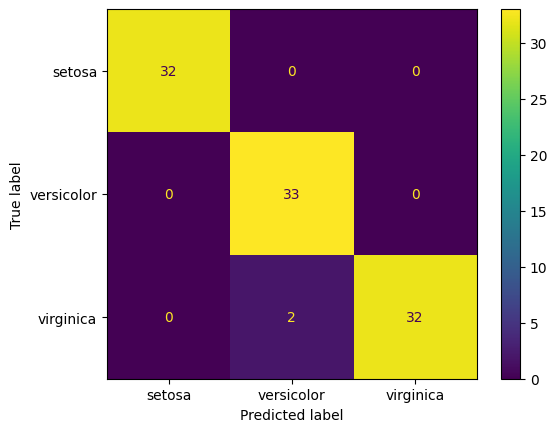

In [28]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(model, xtrain, ytrain)

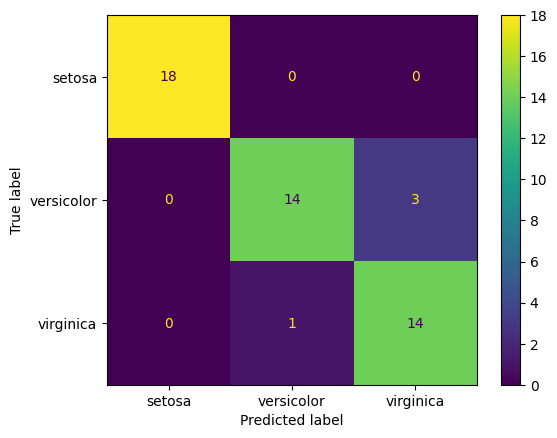

In [29]:
ConfusionMatrixDisplay.from_estimator(model, xtest, ytest)

In [30]:
ypred_test = model.predict(xtest)
ypred_test[0:5]

array(['versicolor', 'setosa', 'setosa', 'setosa', 'versicolor'],
      dtype=object)

In [31]:
ytest.head()

,species
92,versicolor
44,setosa
7,setosa
21,setosa
95,versicolor


In [32]:
model.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [33]:
yprob_test = model.predict_proba(xtest)
yprob_test[0:5].round(4)

array([[0.0196, 0.9182, 0.0622],
       [0.9878, 0.0122, 0.    ],
       [0.9727, 0.0273, 0.    ],
       [0.987 , 0.013 , 0.    ],
       [0.0846, 0.8621, 0.0534]])

In [34]:
from sklearn.metrics import classification_report

print(classification_report(ytest, ypred_test))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        18
  versicolor       0.93      0.82      0.88        17
   virginica       0.82      0.93      0.88        15

    accuracy                           0.92        50
   macro avg       0.92      0.92      0.92        50
weighted avg       0.92      0.92      0.92        50



In [35]:
from sklearn.metrics import f1_score

f1_score(ytest, ypred_test, average="macro")

0.9166666666666666

In [37]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, xtrain, ytrain, cv=5, scoring="f1_macro", n_jobs=-1)
scores

array([0.95213675, 1.        , 1.        , 0.8968254 , 1.        ])

In [38]:
scores.mean()

np.float64(0.9697924297924299)

# Above results confirm that this is a good model

# Step 8 - Out of Sample prediction

In [39]:
xnew = pd.read_csv("iris_sample.csv")
xnew.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.5,2.5,4.0,1.3
1,6.9,3.1,5.1,2.3
2,5.1,2.5,3.0,1.1
3,4.4,2.9,NaN,0.2
4,5.9,3.0,5.1,1.8


In [40]:
num_pipe

,steps,"[('simpleimputer', ...), ('standardscaler', ...)]"
,transform_input,None
,memory,None
,verbose,False
,missing_values,nan
,strategy,'mean'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False
,copy,True


In [41]:
xnew_pre = num_pipe.transform(xnew)
xnew_pre.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.414976,-1.287108,0.142468,0.138633
1,1.275726,0.092598,0.766812,1.454321
2,-0.898033,-1.287108,-0.425118,-0.124505
3,-1.743384,-0.367304,0.000000,-1.308624
4,0.068082,-0.137353,0.766812,0.796477


In [42]:
preds = model.predict(xnew_pre)
preds

array(['versicolor', 'virginica', 'versicolor', 'setosa', 'virginica',
       'setosa', 'versicolor', 'virginica', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'virginica', 'versicolor', 'virginica'],
      dtype=object)

In [43]:
probs = model.predict_proba(xnew_pre).round(4)
probs

array([[1.890e-02, 8.853e-01, 9.580e-02],
       [2.000e-04, 5.760e-02, 9.422e-01],
       [1.002e-01, 8.869e-01, 1.290e-02],
       [7.053e-01, 2.945e-01, 2.000e-04],
       [5.800e-03, 3.209e-01, 6.733e-01],
       [9.643e-01, 3.570e-02, 0.000e+00],
       [1.667e-01, 7.980e-01, 3.540e-02],
       [8.000e-04, 1.514e-01, 8.479e-01],
       [9.856e-01, 1.440e-02, 0.000e+00],
       [9.104e-01, 8.940e-02, 2.000e-04],
       [2.250e-02, 8.973e-01, 8.010e-02],
       [2.460e-02, 9.525e-01, 2.290e-02],
       [0.000e+00, 1.660e-02, 9.834e-01],
       [5.600e-03, 6.714e-01, 3.230e-01],
       [5.000e-04, 4.939e-01, 5.056e-01]])

In [44]:
model.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [45]:
xnew["spcies_pred"] = preds
xnew

,sepal_length,sepal_width,petal_length,petal_width,spcies_pred
0,5.5,2.5,4.0,1.3,versicolor
1,6.9,3.1,5.1,2.3,virginica
2,5.1,2.5,3.0,1.1,versicolor
3,4.4,2.9,NaN,0.2,setosa
4,5.9,3.0,5.1,1.8,virginica
5,5.5,3.5,1.3,0.2,setosa
6,5.6,NaN,3.6,1.3,versicolor
7,6.5,3.0,5.2,2.0,virginica
8,5.3,3.7,1.5,0.2,setosa
9,5.1,3.4,1.5,NaN,setosa


In [46]:
xnew[model.classes_] = probs
xnew

,sepal_length,sepal_width,petal_length,petal_width,spcies_pred,setosa,versicolor,virginica
0,5.5,2.5,4.0,1.3,versicolor,0.0189,0.8853,0.0958
1,6.9,3.1,5.1,2.3,virginica,0.0002,0.0576,0.9422
2,5.1,2.5,3.0,1.1,versicolor,0.1002,0.8869,0.0129
3,4.4,2.9,NaN,0.2,setosa,0.7053,0.2945,0.0002
4,5.9,3.0,5.1,1.8,virginica,0.0058,0.3209,0.6733
5,5.5,3.5,1.3,0.2,setosa,0.9643,0.0357,0.0000
6,5.6,NaN,3.6,1.3,versicolor,0.1667,0.7980,0.0354
7,6.5,3.0,5.2,2.0,virginica,0.0008,0.1514,0.8479
8,5.3,3.7,1.5,0.2,setosa,0.9856,0.0144,0.0000
9,5.1,3.4,1.5,NaN,setosa,0.9104,0.0894,0.0002


# Step 9 - Save the model object and preprocessor

In [47]:
num_pipe

,steps,"[('simpleimputer', ...), ('standardscaler', ...)]"
,transform_input,None
,memory,None
,verbose,False
,missing_values,nan
,strategy,'mean'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False
,copy,True


In [48]:
model

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [49]:
import joblib

joblib.dump(num_pipe, "pre.joblib")

['pre.joblib']

In [50]:
joblib.dump(model, "iris_model.joblib")

['iris_model.joblib']

# Load the preprocessor and model

In [51]:
p = joblib.load("pre.joblib")
p

,steps,"[('simpleimputer', ...), ('standardscaler', ...)]"
,transform_input,None
,memory,None
,verbose,False
,missing_values,nan
,strategy,'mean'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False
,copy,True


In [52]:
m = joblib.load("iris_model.joblib")
m

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [53]:
m.score(xtrain, ytrain)

0.9797979797979798

In [54]:
m.score(xtest, ytest)

0.92